In [18]:
import itertools
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.gridspec as gridspec
from sklearn import datasets
from mlxtend.plotting import plot_learning_curves
from mlxtend.plotting import plot_decision_regions

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import train_test_split, cross_val_score

np.random.seed(0)

In [20]:
iris = datasets.load_iris()

In [22]:
x = iris.data[:, 0:2]

In [23]:
y = iris.target

In [26]:
clf1 = DecisionTreeClassifier(criterion = 'entropy', max_depth = 1)
clf2 = KNeighborsClassifier(n_neighbors = 1)

In [37]:
Bagging1 = BaggingClassifier(base_estimator = clf1, n_estimators = 10, max_samples = 0.8, max_features = 0.8)
Bagging2 = BaggingClassifier(base_estimator = clf2, n_estimators = 10, max_samples = 0.8, max_features = 0.8)

Accuracy: 0.63 (+/- 0.02) [Decison Tree]
Accuracy: 0.70 (+/- 0.02) [K-NN]
Accuracy: 0.72 (+/- 0.04) [Bagging Tree]
Accuracy: 0.58 (+/- 0.09) [Bagging K-NN]


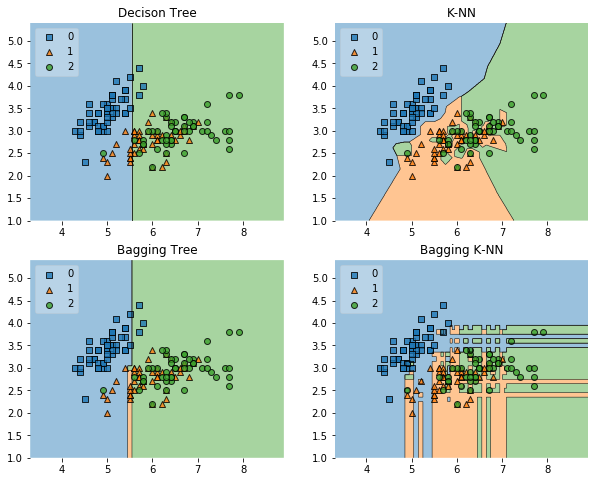

In [46]:
label = ['Decison Tree', 'K-NN', 'Bagging Tree', 'Bagging K-NN']
clf_list = [clf1, clf2, Bagging1, Bagging2]

fig = plt.figure(figsize = (10, 8))
gs = gridspec.GridSpec(2, 2)
grid = itertools.product([0, 1], repeat = 2)

for clf, label, grd in zip(clf_list, label, grid):
    scores = cross_val_score(clf, x, y, cv = 3, scoring = 'accuracy')
    print('Accuracy: %.2f (+/- %.2f) [%s]' %(scores.mean(), scores.std(), label))
    
    clf.fit(x, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X = x, y = y, clf = clf, legend = 2)
    plt.title(label)
plt.show()